# Midterm Exam 01

- This is a closed book exam
- You should only ever have a SINGLE browser tab open
- The exam lasts 75 minutes, and Sakai will not accept late submissions
- You may use the following:

    - TAB completion
    - SHIFT-TAB completion for function arguments
    - help(func), `?func`, `func?` to get help on `func`
    
- To create a new cell, use `ESC-A` or `ESC-B`

## Duke Honor Code

By taking this exam, you agree to abide by the Duke Honor Code.

### All necessary imports have been made for you

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools as it
import pandas as pd
from string import punctuation
import re

**1**. (30 points)

- Write a function to find where f(x) crosses zero using a bisection algorithm. The bisection algorithm works in the following way - given the left and right boundary, it checks if the crossing is between left and mid-point, or between the right and mid-point. If the former, the mid-point is set as the new right boundary and so on. In other words the interval containing the crossing is halved at each step. Stop when the length of the interval is less than 1e-6, and return the left and right boundaries at that point.
    - The function should have the signature `bisect(f, left=0, right=1, tol=1e-6)`
    - Use `bisect` to find the left and right intervals containing a zero (root) of the function $x^3 + 4x^2 - 1$ between 0 and 1.
    - <font color=red>Hint</font>: If the crossing is between left and right, the function evaluated at left and right must have opposite signs. (20 points)

- Plot the function together with a horizontal line for $y=0$ and a red circle at the root whose coordinates are (`left`, 0). The x-limits of the plot should be 0 and 1. (10 points)

In [2]:
def bisect(f, left=0, right=1, tol=1e-6):
    """Docstring"""
    
    if f(left) * f(right) > 0:
        return None
    
    mid = (left + right)/2
    err = abs(right - left)
    
    i = 0
    
    while (err > tol) and (i < 1000):
        i += 1
        
        if f(mid) == 0:
            return (mid, mid)
        
        if f(left) * f(mid) < 0:
            right = mid
        else:
            left = mid
        
        mid = (left + right)/2
        err = abs(right - left)
        
    return (left, right)

In [3]:
f = lambda x: x**3 + 4*x**2 -1

In [4]:
left, right = bisect(f)
left, right

(0.47283363342285156, 0.47283458709716797)

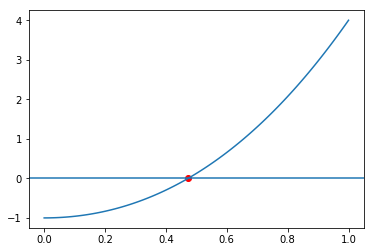

In [5]:
xp = np.linspace(0, 1, 100)
plt.plot(xp, f(xp))
plt.axhline(0)
plt.scatter([left], [0], c='red')
pass

The following question require you to process the following books: `austen-emma.txt`, `austen-persuasion.txt` and `austen-sense.txt` in the `data` folder.

In [6]:
books = ['data/austen-emma.txt',
         'data/austen-persuasion.txt', 
         'data/austen-sense.txt']

**2**. (15 points)

- Write a function to pre-process a string argument by removing punctuation and converting to lower case (5 points)
- Write a function to read in a single text file (given the file path as argument) and return the pre-processed text in that file as a single string (5 points)
- Write a function that takes as argument a list of words and returns a dictionary where the key is a word and the value is the word count. (5 points)

In [7]:
def preprocess(s):
    """Docstring."""

    return s.translate(str.maketrans('', '', punctuation)).lower()

In [8]:
def read_text(path):
    """Docstring."""
    
    with open(path) as f:
        return preprocess(f.read())

In [9]:
def count_words(words):
    """Docstring."""
    
    d = {}
    for word in words:
        d[word] = d.get(word, 0) + 1
    return d

**3** (15 points)

- Create a dictionary where the keys are the book titles and the values are the pre-processed text of each book (5 point)
- Create a dictionary where the keys are the book titles and the values are all the words (including repetitions) in each book, where a word is any token split by white space after pre-processing (5 points)
- Create a vocabulary of unique words (combining all words from the 3 books) and print the 3 most common words and their counts (5 points)

In [10]:
text_dict = {}
for book in books:
    text_dict[book] = read_text(book)

In [11]:
word_dict = {book: read_text(book).split() for book in books}

In [12]:
words = it.chain.from_iterable(word_dict.values())
vocab_count = count_words(words)

In [13]:
sorted(vocab_count.items(), key=lambda x: x[1], reverse=True)[:3]

[('the', 12559), ('to', 12017), ('and', 10794)]

**4** (15 points)

- Create a data frame where the rows are unique words, the columns are books, and the cells are counts of each word in each book (15 points)

Note: It is ok if some entries are NaN for now.

In [14]:
counts = {book: count_words(words) for book, words in word_dict.items()}    
df = pd.DataFrame(counts)

<font color=red>Note: </font>If you are not able to create the data frame, use this one `data/bag_of_words.csv` 

**5**. (15 points)

- Display the 5 rows with the largest row minimums (5 points)
- Drop all rows where the count in ANY column is 0, and report the number of rows left (5 points)
- Normalize the data frame so that each row sums to 1 - i.e. each cell contains the relative fraction of the row word across the 3 books (5 points)

In [15]:
df['min'] = df.min(axis=1)
df.sort_values('min', ascending=False)[:3]

,data/austen-emma.txt,data/austen-persuasion.txt,data/austen-sense.txt,min
the,5146.0,3326.0,4087.0,3326.0
to,5149.0,2782.0,4086.0,2782.0
and,4613.0,2782.0,3399.0,2782.0


In [16]:
df = df.drop('min', axis=1)

In [17]:
df = df.dropna()
df.shape

(3318, 3)

In [18]:
row_sums = df.apply('sum', axis=1)
df = df.divide(row_sums, axis=0)

In [19]:
df.head()

,data/austen-emma.txt,data/austen-persuasion.txt,data/austen-sense.txt
a,0.457905,0.237073,0.305022
abilities,0.200000,0.200000,0.600000
able,0.468531,0.209790,0.321678
abode,0.142857,0.142857,0.714286
about,0.505133,0.199179,0.295688


**6**. (10 points)

- Use a regular expression to extract only rows with words that contain 3 or more vowels (5 points)
- Save the data frame as a CSV file in the `data` folder - the CSV file should have the following columns (`word`, `austen-emma.txt`, `austen-persuasion.txt`, and `austen-sense.txt`). Run `!head data/vowel_rich.txt` to check that the CSV file looks like you expect it to. (5 points)

In [20]:
idx = df.index.str.match('(.*[aeiou].*){3,}', case=False)
vowel_rich = df[idx]
vowel_rich.index.name = 'word'
vowel_rich.head()

,data/austen-emma.txt,data/austen-persuasion.txt,data/austen-sense.txt
word,,,
abilities,0.200000,0.200000,0.600000
abode,0.142857,0.142857,0.714286
about,0.505133,0.199179,0.295688
above,0.315789,0.157895,0.526316
abroad,0.300000,0.250000,0.450000


In [21]:
vowel_rich.to_csv('data/vowel_rich.txt')

In [22]:
! head data/vowel_rich.txt

word,data/austen-emma.txt,data/austen-persuasion.txt,data/austen-sense.txt
abilities,0.2,0.2,0.6
abode,0.14285714285714285,0.14285714285714285,0.7142857142857143
about,0.5051334702258727,0.19917864476386038,0.29568788501026694
above,0.3157894736842105,0.15789473684210525,0.5263157894736842
abroad,0.3,0.25,0.45
absence,0.4411764705882353,0.2647058823529412,0.29411764705882354
absolute,0.3333333333333333,0.3333333333333333,0.3333333333333333
absolutely,0.6875,0.10416666666666667,0.20833333333333334
absurdity,0.16666666666666666,0.16666666666666666,0.6666666666666666
